In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings

In [2]:
iris = pd.read_csv('IRIS.csv')

In [21]:
print("Dataset Preview:")
print(iris.head())

Dataset Preview:
   sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   species_encoded  
0                0  
1                0  
2                0  
3                0  
4                0  


In [9]:
# Basic Dataset Information
print("\nSummary of Dataset:")
print(iris.describe())


Summary of Dataset:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [13]:
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [11]:
# Check for missing values
print("Missing Values:")
print(iris.isnull().sum())

Missing Values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [15]:
# Encode the target variable
label_encoder = LabelEncoder()
iris['species_encoded'] = label_encoder.fit_transform(iris['species'])

In [17]:
print("\nEncoded Classes:")
print(label_encoder.classes_)


Encoded Classes:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [23]:
# Dataset Dimensions
print(f"\nDataset Shape: {iris.shape}")

# Grouped Statistics
print("\nGrouped Mean by Species:")
print(iris.groupby('species').mean())


Dataset Shape: (150, 6)

Grouped Mean by Species:
                 sepal_length  sepal_width  petal_length  petal_width  \
species                                                                 
Iris-setosa             5.006        3.418         1.464        0.244   
Iris-versicolor         5.936        2.770         4.260        1.326   
Iris-virginica          6.588        2.974         5.552        2.026   

                 species_encoded  
species                           
Iris-setosa                  0.0  
Iris-versicolor              1.0  
Iris-virginica               2.0  


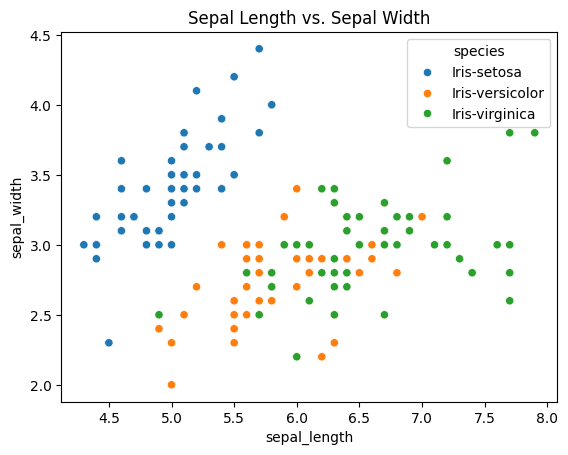

In [25]:
# Visualizations
# Scatter Plot
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.title("Sepal Length vs. Sepal Width")
plt.show()

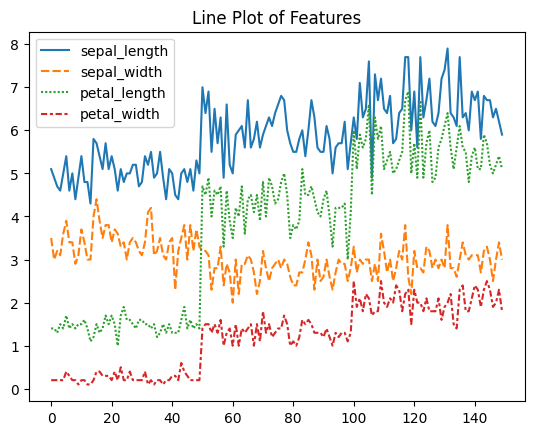

In [27]:
# Line Plot
sns.lineplot(data=iris.drop(['species', 'species_encoded'], axis=1))
plt.title("Line Plot of Features")
plt.show()

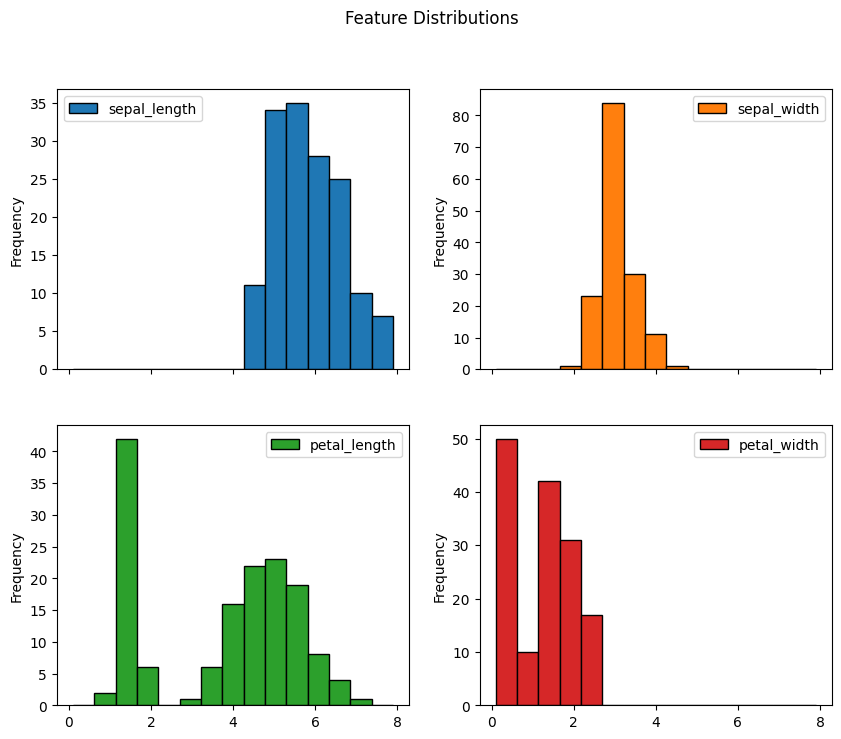

In [29]:
# Histogram for each feature
iris.drop(['species', 'species_encoded'], axis=1).plot.hist(subplots=True, layout=(2, 2), figsize=(10, 8), bins=15, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

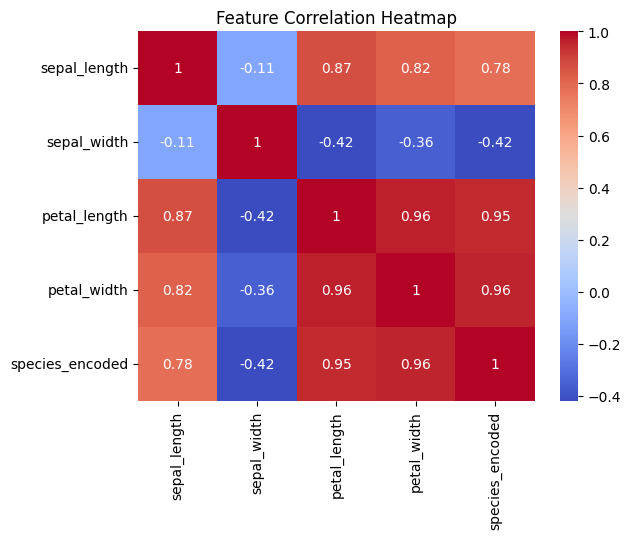

In [31]:
# Compute correlation only for numeric columns
numeric_iris = iris.drop('species', axis=1)

# Create the heatmap
sns.heatmap(numeric_iris.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [33]:
# Split features and target
X = iris.drop(['species', 'species_encoded'], axis=1)
y = iris['species_encoded']

In [35]:
from sklearn.model_selection import train_test_split

# Split dataset (60% training, 40% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Display the split dimensions
print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")

Training Set Shape: (90, 4)
Testing Set Shape: (60, 4)


In [37]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluate SVM
print("\nSVM Classification Report:")
print(metrics.classification_report(y_test, y_pred_svm))
print(f"SVM Accuracy: {metrics.accuracy_score(y_test, y_pred_svm):.4f}")


SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      0.95      0.95        20
           2       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

SVM Accuracy: 0.9667


In [39]:
import joblib

# Save the best model to a file
joblib.dump(svm, 'model.pkl')

print("Model saved successfully!")

Model saved successfully!
